In [1]:
import os
# os.chdir("/home/llx/project/MSI_data/sma/V11T17-102/V11T17-102_B1/output_data/V11T17-102_B1_MSI")
omics_adata_1_path="/home/llx/project/MSI_data/sma/V11T17-102/V11T17-102_B1/output_data/V11T17-102_B1_MSI/V11T17-102_B1.Visium.FMP.220826_smamsi.csv"
omics_adata_2_path='/home/llx/project/MSI_data/sma/V11T17-102/V11T17-102_B1/output_data/V11T17-102_B1_RNA/outs/'
HE_path="/home/llx/project/MSI_data/sma/V11T17-102/V11T17-102_B1/output_data/V11T17-102_B1_RNA/outs/spatial/tissue_hires_image.png"

# import T2M

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/home/llx/software/miniconda3/envs/pyg_ms/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ms_df=pd.read_csv(omics_adata_1_path)
st_adata=sc.read_visium(omics_adata_2_path,
                        count_file='filtered_feature_bc_matrix.h5',
                        source_image_path='tissue_hires_image.png')
st_adata

/home/llx/software/miniconda3/envs/pyg_ms/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/llx/software/miniconda3/envs/pyg_ms/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4984 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
sample_name=list(st_adata.uns["spatial"].keys())[0]

In [5]:
st_adata.obsm["spatial"]*st_adata.uns["spatial"][sample_name]["scalefactors"]["tissue_hires_scalef"]

array([[ 415.296042  ,  116.85854964],
       [1439.80259472, 1156.94898354],
       [ 737.41774428,  179.72861382],
       ...,
       [ 544.90130184, 1051.52135466],
       [ 710.97860022, 1633.26476082],
       [ 832.73024184,  262.9522959 ]])

In [6]:
st_adata.obsm["spatial"]

array([[10100,  2842],
       [35016, 28137],
       [17934,  4371],
       ...,
       [13252, 25573],
       [17291, 39721],
       [20252,  6395]])

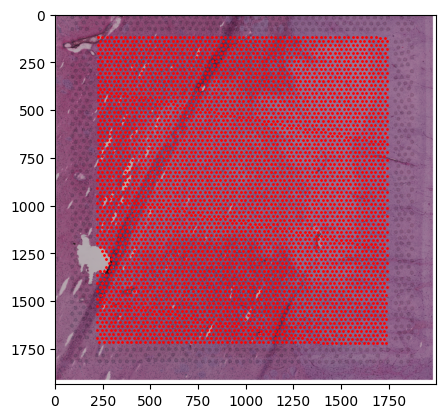

In [7]:
x=list(st_adata.obsm["spatial"][:,0]*st_adata.uns["spatial"][sample_name]["scalefactors"]["tissue_hires_scalef"])
y=list(st_adata.obsm["spatial"][:,1]*st_adata.uns["spatial"][sample_name]["scalefactors"]["tissue_hires_scalef"])
image = mpimg.imread(HE_path)
plt.imshow(image)
plt.scatter(x,y,s=1,c="red")
# plt.scatter()

In [8]:
image.shape

(1937, 2000, 3)

In [9]:
def af_tranfor(x_y,af):
    """
    x_y np.array shape 2*n
    af np.array shape 3*3
    """
    x_y=np.concatenate([x_y,np.ones((x_y.shape[0],1))],axis=1)
    x_y=np.matmul(af,x_y.T)
    x_y=x_y.T
    return x_y

In [10]:
ms_X_Y=ms_df.iloc[:,[0,1]]

In [11]:
scale=1/st_adata.uns["spatial"][sample_name]["scalefactors"]["tissue_hires_scalef"]/0.8
scale

30.400000778240017

In [12]:
x_y=np.array(ms_X_Y)

af=np.array([[0,scale,120],
             [-scale,0,2000],
             [0,0,1]])
x_y=af_tranfor(x_y,af)

In [13]:
x_y=pd.DataFrame(x_y[:,0:2],columns=["x","y"])

In [14]:
x_y

,x,y
0,120.000000,2000.00000
1,150.400001,2000.00000
2,180.800002,2000.00000
3,211.200002,2000.00000
4,241.600003,2000.00000
...,...,...
4025,1852.800044,54.39995
4026,1883.200045,54.39995
4027,1913.600046,54.39995
4028,1944.000047,54.39995


In [15]:
ms_sp=ms_df.copy()
ms_sp.loc[:,["he_x","he_y"]]=x_y.to_numpy()
ms_sp

,x,y,156.26059,156.26195,156.48344,156.4838,156.485,157.54681,158.41217,160.02547,...,1046.31366,1046.32671,1046.33977,1046.36442,1048.32025,1048.3319,1048.34354,1048.38431,he_x,he_y
0,0,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,89970.414062,214465.421875,3887498.250,196427.406250,57448.312500,225108.328125,1.074589e+06,135989.140625,120.000000,2000.00000
1,0,1,45238.468750,30944.296875,45184.789062,0.00000,0.000000,0.000000,0.0,0.000000,...,73180.992188,190653.109375,2557397.500,101411.101562,0.000000,165879.703125,6.850260e+05,99276.125000,150.400001,2000.00000
2,0,2,0.000000,0.000000,0.000000,133714.34375,0.000000,0.000000,0.0,137891.890625,...,0.000000,0.000000,4145253.000,0.000000,0.000000,92802.578125,1.497654e+06,0.000000,180.800002,2000.00000
3,0,3,54406.492188,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,56726.687500,...,0.000000,232973.000000,3301641.500,137529.468750,0.000000,72892.625000,1.031929e+06,0.000000,211.200002,2000.00000
4,0,4,37755.425781,43909.414062,0.000000,0.00000,0.000000,0.000000,0.0,14179.291992,...,0.000000,131838.000000,2680834.250,144987.968750,8313.188477,135057.546875,6.813216e+05,69293.976562,241.600003,2000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025,64,57,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,15106.763672,...,41978.261719,444783.375000,1864467.625,81357.875000,0.000000,61511.832031,8.319362e+05,52919.773438,1852.800044,54.39995
4026,64,58,0.000000,0.000000,0.000000,0.00000,26186.896484,0.000000,0.0,6788.051758,...,0.000000,185181.015625,1984337.625,61714.910156,0.000000,95984.171875,4.856208e+05,92586.703125,1883.200045,54.39995
4027,64,59,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,212804.296875,2097173.750,116205.140625,0.000000,84000.312500,5.340729e+05,0.000000,1913.600046,54.39995
4028,64,60,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,52327.890625,167268.968750,2215489.750,39677.074219,0.000000,50965.066406,1.004989e+06,25649.371094,1944.000047,54.39995


In [16]:
# from scipy.sparse import csr_matrix, csc_matrix, coo_matrix
# import anndata as ad
# from PIL import Image
# def ms2anndata(ms_org,ms_sp,HE_path,in_tissue=True):
#     spot=[f"mspx_{i}" for i in range(len(ms_org))]
#     ms_name=[f"{i}" for i in ms_org.iloc[:,2:].columns]
    
#     ms_cons=pd.concat([pd.Series(spot),ms_sp.loc[:,["he_x","he_y"]],ms_org],axis=1)
#     # 计算每一行的总和（从第3列开始）
#     row_sums = ms_cons.iloc[:, 5:].sum(axis=1)
#     # 删除总和为0的行
#     ms_n = ms_cons[row_sums >= 1e6]
#     ms_n.iloc[:, 5:] = ms_n.iloc[:, 5:].apply(lambda x: x - x.min(), axis=0)
#     df_ms = ms_n.iloc[:, 5:].T
#     ms_intensity = csr_matrix(ms_n.iloc[:,5:], dtype=np.float32)
#     ms_adata = ad.AnnData(ms_intensity)
#     ms_adata.var_names=ms_n.iloc[:,5:].columns
#     ms_adata.obs_names=ms_n.iloc[:,0]
#     ms_n.index = ms_n.iloc[:,0]
#     ms_adata.obs["array_row"]=ms_n.iloc[:,3] ##raw x
#     ms_adata.obs["array_col"]=ms_n.iloc[:,4] ##raw y
#     ms_adata.obsm["spatial"]=ms_n.loc[:,["he_x","he_y"]].to_numpy()
#     image_path = HE_path
#     image = Image.open(image_path)
#     image_array = np.array(image)
#     spatial_key = "spatial"
#     library_id = "tissue"  # 你可以自定义这个 ID
#     ms_adata.uns[spatial_key] = {library_id: library_id}
#     ms_adata.uns[spatial_key][library_id]["images"] = {"hires": image_array}
#     ms_adata.uns[spatial_key][library_id]["scalefactors"] = {
#         "tissue_hires_scalef": 1,  # 图像像素和空间坐标的比例因子
#         "spot_diameterres_full": 0.5,  # 每个观测点的直径
#         'fiducial_diameter_fullres': 609.8565193216596,
#         'spot_diameter_fullres': 377.5302262467417
#     }
#     return ms_adata

In [16]:
import SM2ST
ms_adata = SM2ST.ms2anndata(ms_df,ms_sp,HE_path,in_tissue=True)

[<Axes: title={'center': '674.28592'}, xlabel='spatial1', ylabel='spatial2'>,
 <Axes: title={'center': '674.2805'}, xlabel='spatial1', ylabel='spatial2'>]

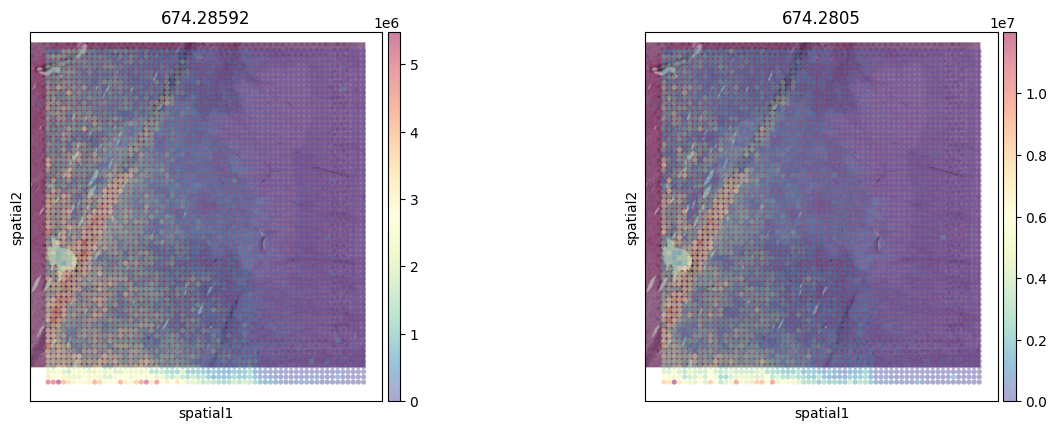

In [17]:
sc.pl.spatial(ms_adata, 
              img_key="hires", 
              color=['674.28592','674.2805'], 
              cmap='Spectral_r', 
              ncols=3,
              img=None, 
              size=0.08,
              spot_size=None, 
              bw=False, 
              alpha_img=1,
              alpha=0.5,
              show=False)

[<Axes: title={'center': '674.28592'}, xlabel='spatial1', ylabel='spatial2'>,
 <Axes: title={'center': '674.2805'}, xlabel='spatial1', ylabel='spatial2'>]

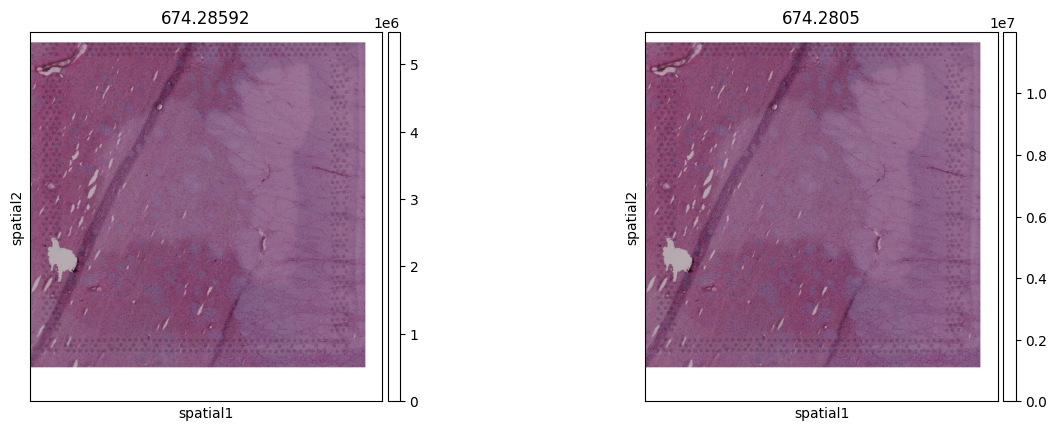

In [34]:
sc.pl.spatial(ms_adata, 
              img_key="hires", 
              color=['674.28592','674.2805'], 
              cmap='Spectral_r', 
              ncols=3,
              img=None, 
              size=30,
              spot_size=None, 
              bw=False, 
              alpha_img=1,
              alpha=0,
              show=False)

In [35]:
ms_adata.write("ms.h5ad")